# Car Price Prediction Multiple Linear Regression

Problem in <a href='https://www.kaggle.com/datasets/hellbuoy/car-price-prediction'>Kaggle</a>

## Declaração do problema
A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis ​​são significativas na previsão do preço de um carro
Como essas variáveis ​​descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros no mercado americano.

## Objetivo de Negócios
Somos obrigados a modelar o preço dos carros com as variáveis ​​independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis ​​independentes. 
## Dicionário de dados
Coluna|Descrição
-----|-----
Symboling	|Sua classificação de risco de seguro atribuída, um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro. (Categórico)
carCompany |	Nome da empresa de carros (categórica)
fueltype |	Tipo de combustível de carro, ou seja, gás ou diesel (categórico)
aspiration | 	Aspiração usada em um carro (categórico)
doornumber |	Número de portas em um carro (categórico)
carbody |	Corpo de carro (categórico)
drivewheel |	tipo de roda de acionamento (categórica)
enginelocation |	Localização do motor do carro (categórico)
wheelbase |	Weelbase de carro (numérico)
carlength |	Comprimento do carro (numérico)
carwidth |	Largura do carro (numérico)
carheight |	Altura do carro (numérico)
curbweight |	O peso de um carro sem ocupantes ou bagagem. (Numérico)
enginetype |	Tipo de motor. (Categórico)
cylindernumber |	Cilindro colocado no carro (categórico)
enginesize |	Tamanho do carro (numérico)
fuelsystem |	Sistema de combustível de carro (categórico)
boreratio |	Boreratio de carro (numérico)
stroke |	AVC ou volume dentro do motor (numérico)
compressionratio |	Taxa de compressão de carro (numérico)
horsepower |	Potência (numérica)
peakrpm |	RPM de pico de carro (numérico)
citympg |	Milhagem na cidade (numérica)
highwaympg |	Milhagem na rodovia (numérica)
price(Dependent variable) |	Preço do carro (numérico)

# 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from boruta import BorutaPy

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # para conseguir ver todas as colunas

In [2]:
df = pd.read_csv('dados/CarPrice_Assignment.csv')

# 2. Data Wrangling

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 2.1 Remover colunas
Colunas não relevantes para o projeto como car_ID e CarName

In [5]:
df = df.drop(columns=['CarName'])

<Axes: >

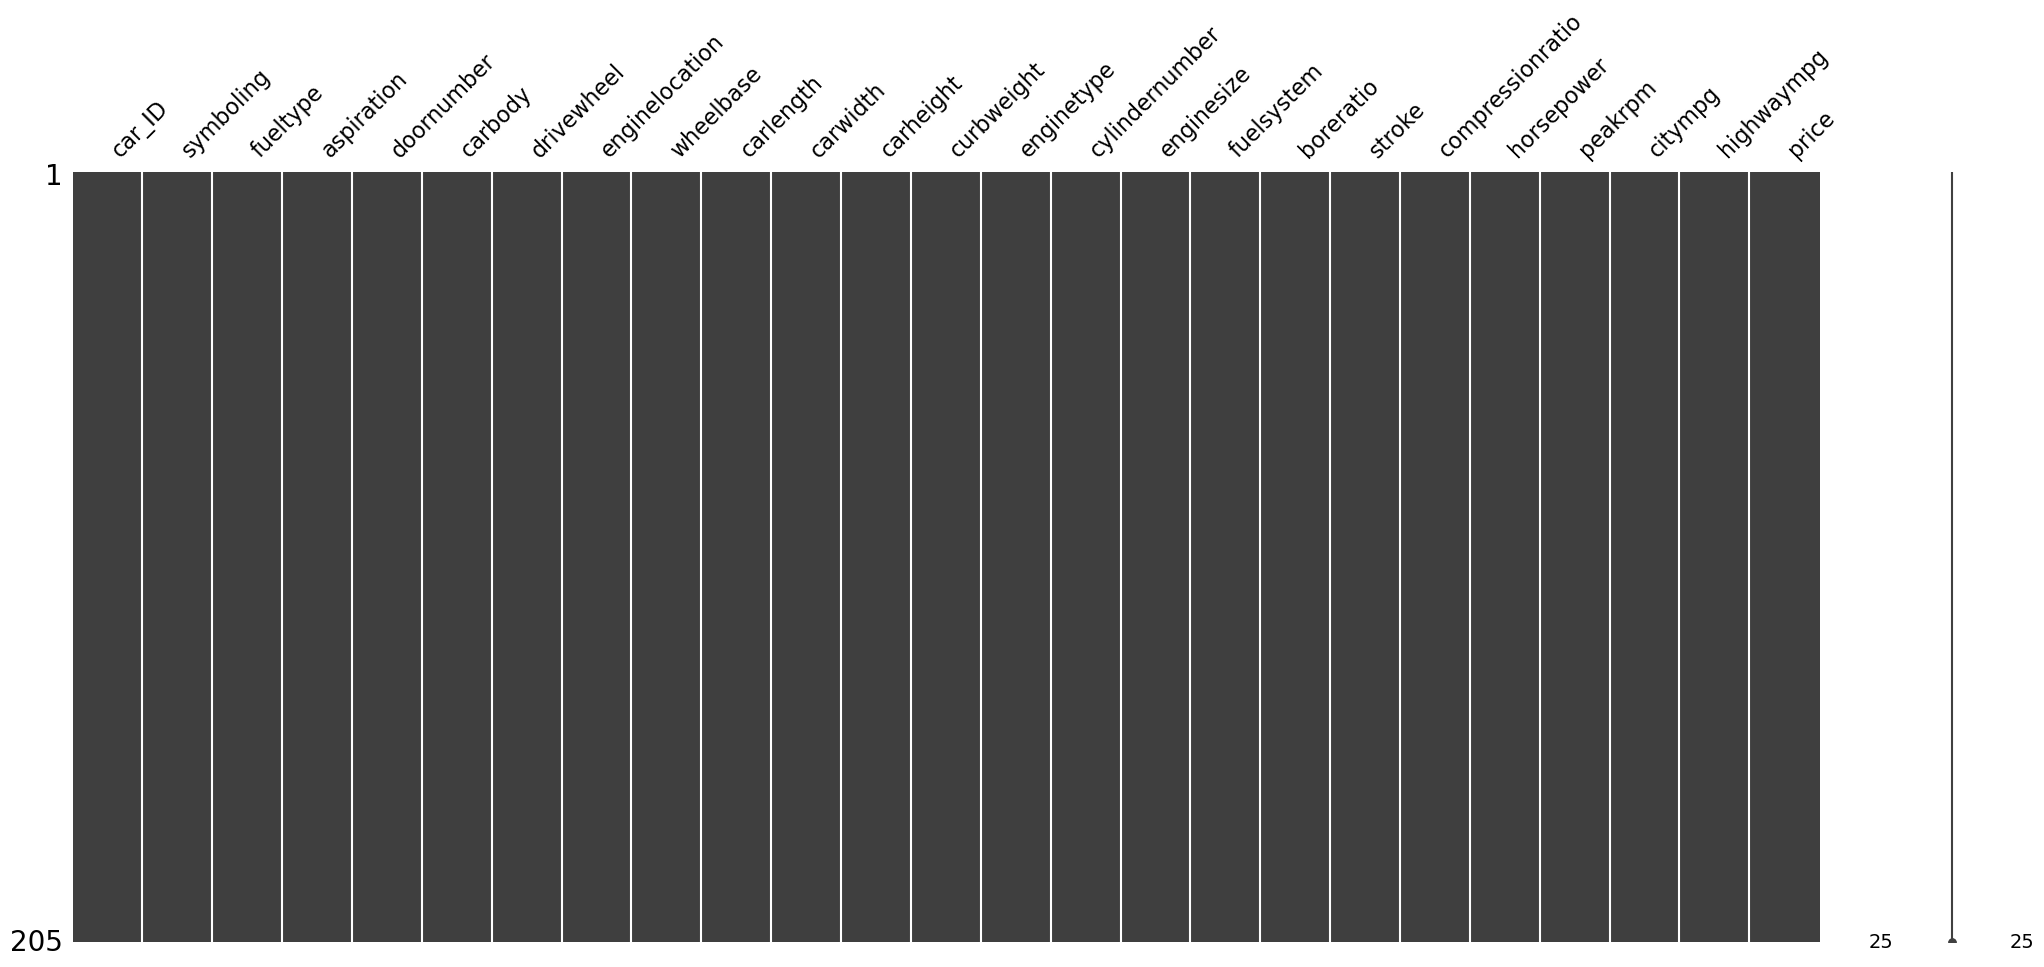

In [6]:
# Plotar o gráfico de matriz de dados ausentes
msno.matrix(df)

Não tem valores ausentes para esse dataset

## 2.2 Tratando varivavel symboling
tratamento necessário para remover valores negativos

In [7]:
# Mapear os valores antigos para os novos valores
symboling_mapping = {3: 0, 1: 1, 2: 2, 0: 3, -1: 4, -2: 5}

# Aplicar o mapeamento à coluna 'symboling'
df['symboling'] = df['symboling'].map(symboling_mapping)
df['symboling'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

## 2.3 Tratando a variáveis explicativas

In [8]:
columns = [ 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [9]:
df.set_index(df['car_ID'], inplace=True)

### 2.3.1 Convertendo as variáveis alfanuméricas para numéricas

In [10]:
# Label Encoder

columns = ['cylindernumber','doornumber']

label_encoder = LabelEncoder()

for column in columns:
    df[column] = label_encoder.fit_transform(df[column]) + 1  # Adiciona 1 aos valores codificados


### 2.3.2 One-hot encoding
Dummyzando as colunas categóricas nominais, ou seja, aquelas que não possuem uma ordem natural entre as categorias.

In [11]:
categorical_columns = ['fueltype', 'aspiration', 'carbody',
                       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
df_dummies = pd.get_dummies(df, columns=categorical_columns)
df_dummies.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,88.6,168.8,64.1,48.8,2548,3,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0,2,88.6,168.8,64.1,48.8,2548,3,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,1,2,94.5,171.2,65.5,52.4,2823,4,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,4,2,1,99.8,176.6,66.2,54.3,2337,3,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,5,2,1,99.4,176.6,66.4,54.3,2824,2,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# 3. EDA

## 3.1 Estatística descritiva

In [12]:
df_dummies.describe().round(2)

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.0,205.0,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.0,205.00,205.00,205.00,205.00
mean,103.00,2.06,1.44,98.76,174.05,65.91,53.72,2555.57,3.12,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71,0.1,0.9,0.82,0.18,0.03,0.04,0.34,0.47,0.12,0.04,0.59,0.37,0.99,0.01,0.06,0.00,0.06,0.72,0.07,0.06,0.02,0.05,0.32,0.01,0.1,0.00,0.46,0.04,0.00
std,59.32,1.30,0.50,6.02,12.34,2.15,2.44,520.68,0.80,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85,0.3,0.3,0.39,0.39,0.17,0.19,0.48,0.50,0.33,0.21,0.49,0.48,0.12,0.12,0.24,0.07,0.24,0.45,0.26,0.24,0.14,0.23,0.47,0.12,0.3,0.07,0.50,0.21,0.07
min,1.00,0.00,1.00,86.60,141.10,60.30,47.80,1488.00,1.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,52.00,1.00,1.00,94.50,166.30,64.10,52.00,2145.00,3.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00,0.0,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
50%,103.00,2.00,1.00,97.00,173.20,65.50,54.10,2414.00,3.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00,0.0,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
75%,154.00,3.00,2.00,102.40,183.10,66.90,55.50,2935.00,3.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00,0.0,1.0,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,1.00,0.00,0.00
max,205.00,5.00,2.00,120.90,208.10,72.30,59.80,4066.00,7.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00


## 3.2 Correlação relação ao Price

In [13]:
df_dummies.corr().round(2).loc['price']

car_ID                 -0.11
symboling               0.11
doornumber             -0.03
wheelbase               0.58
carlength               0.68
carwidth                0.76
carheight               0.12
curbweight              0.84
cylindernumber         -0.03
enginesize              0.87
boreratio               0.55
stroke                  0.08
compressionratio        0.07
horsepower              0.81
peakrpm                -0.09
citympg                -0.69
highwaympg             -0.70
price                   1.00
fueltype_diesel         0.11
fueltype_gas           -0.11
aspiration_std         -0.18
aspiration_turbo        0.18
carbody_convertible     0.19
carbody_hardtop         0.23
carbody_hatchback      -0.26
carbody_sedan           0.13
carbody_wagon          -0.04
drivewheel_4wd         -0.06
drivewheel_fwd         -0.60
drivewheel_rwd          0.64
enginelocation_front   -0.32
enginelocation_rear     0.32
enginetype_dohc         0.15
enginetype_dohcv        0.16
enginetype_l  

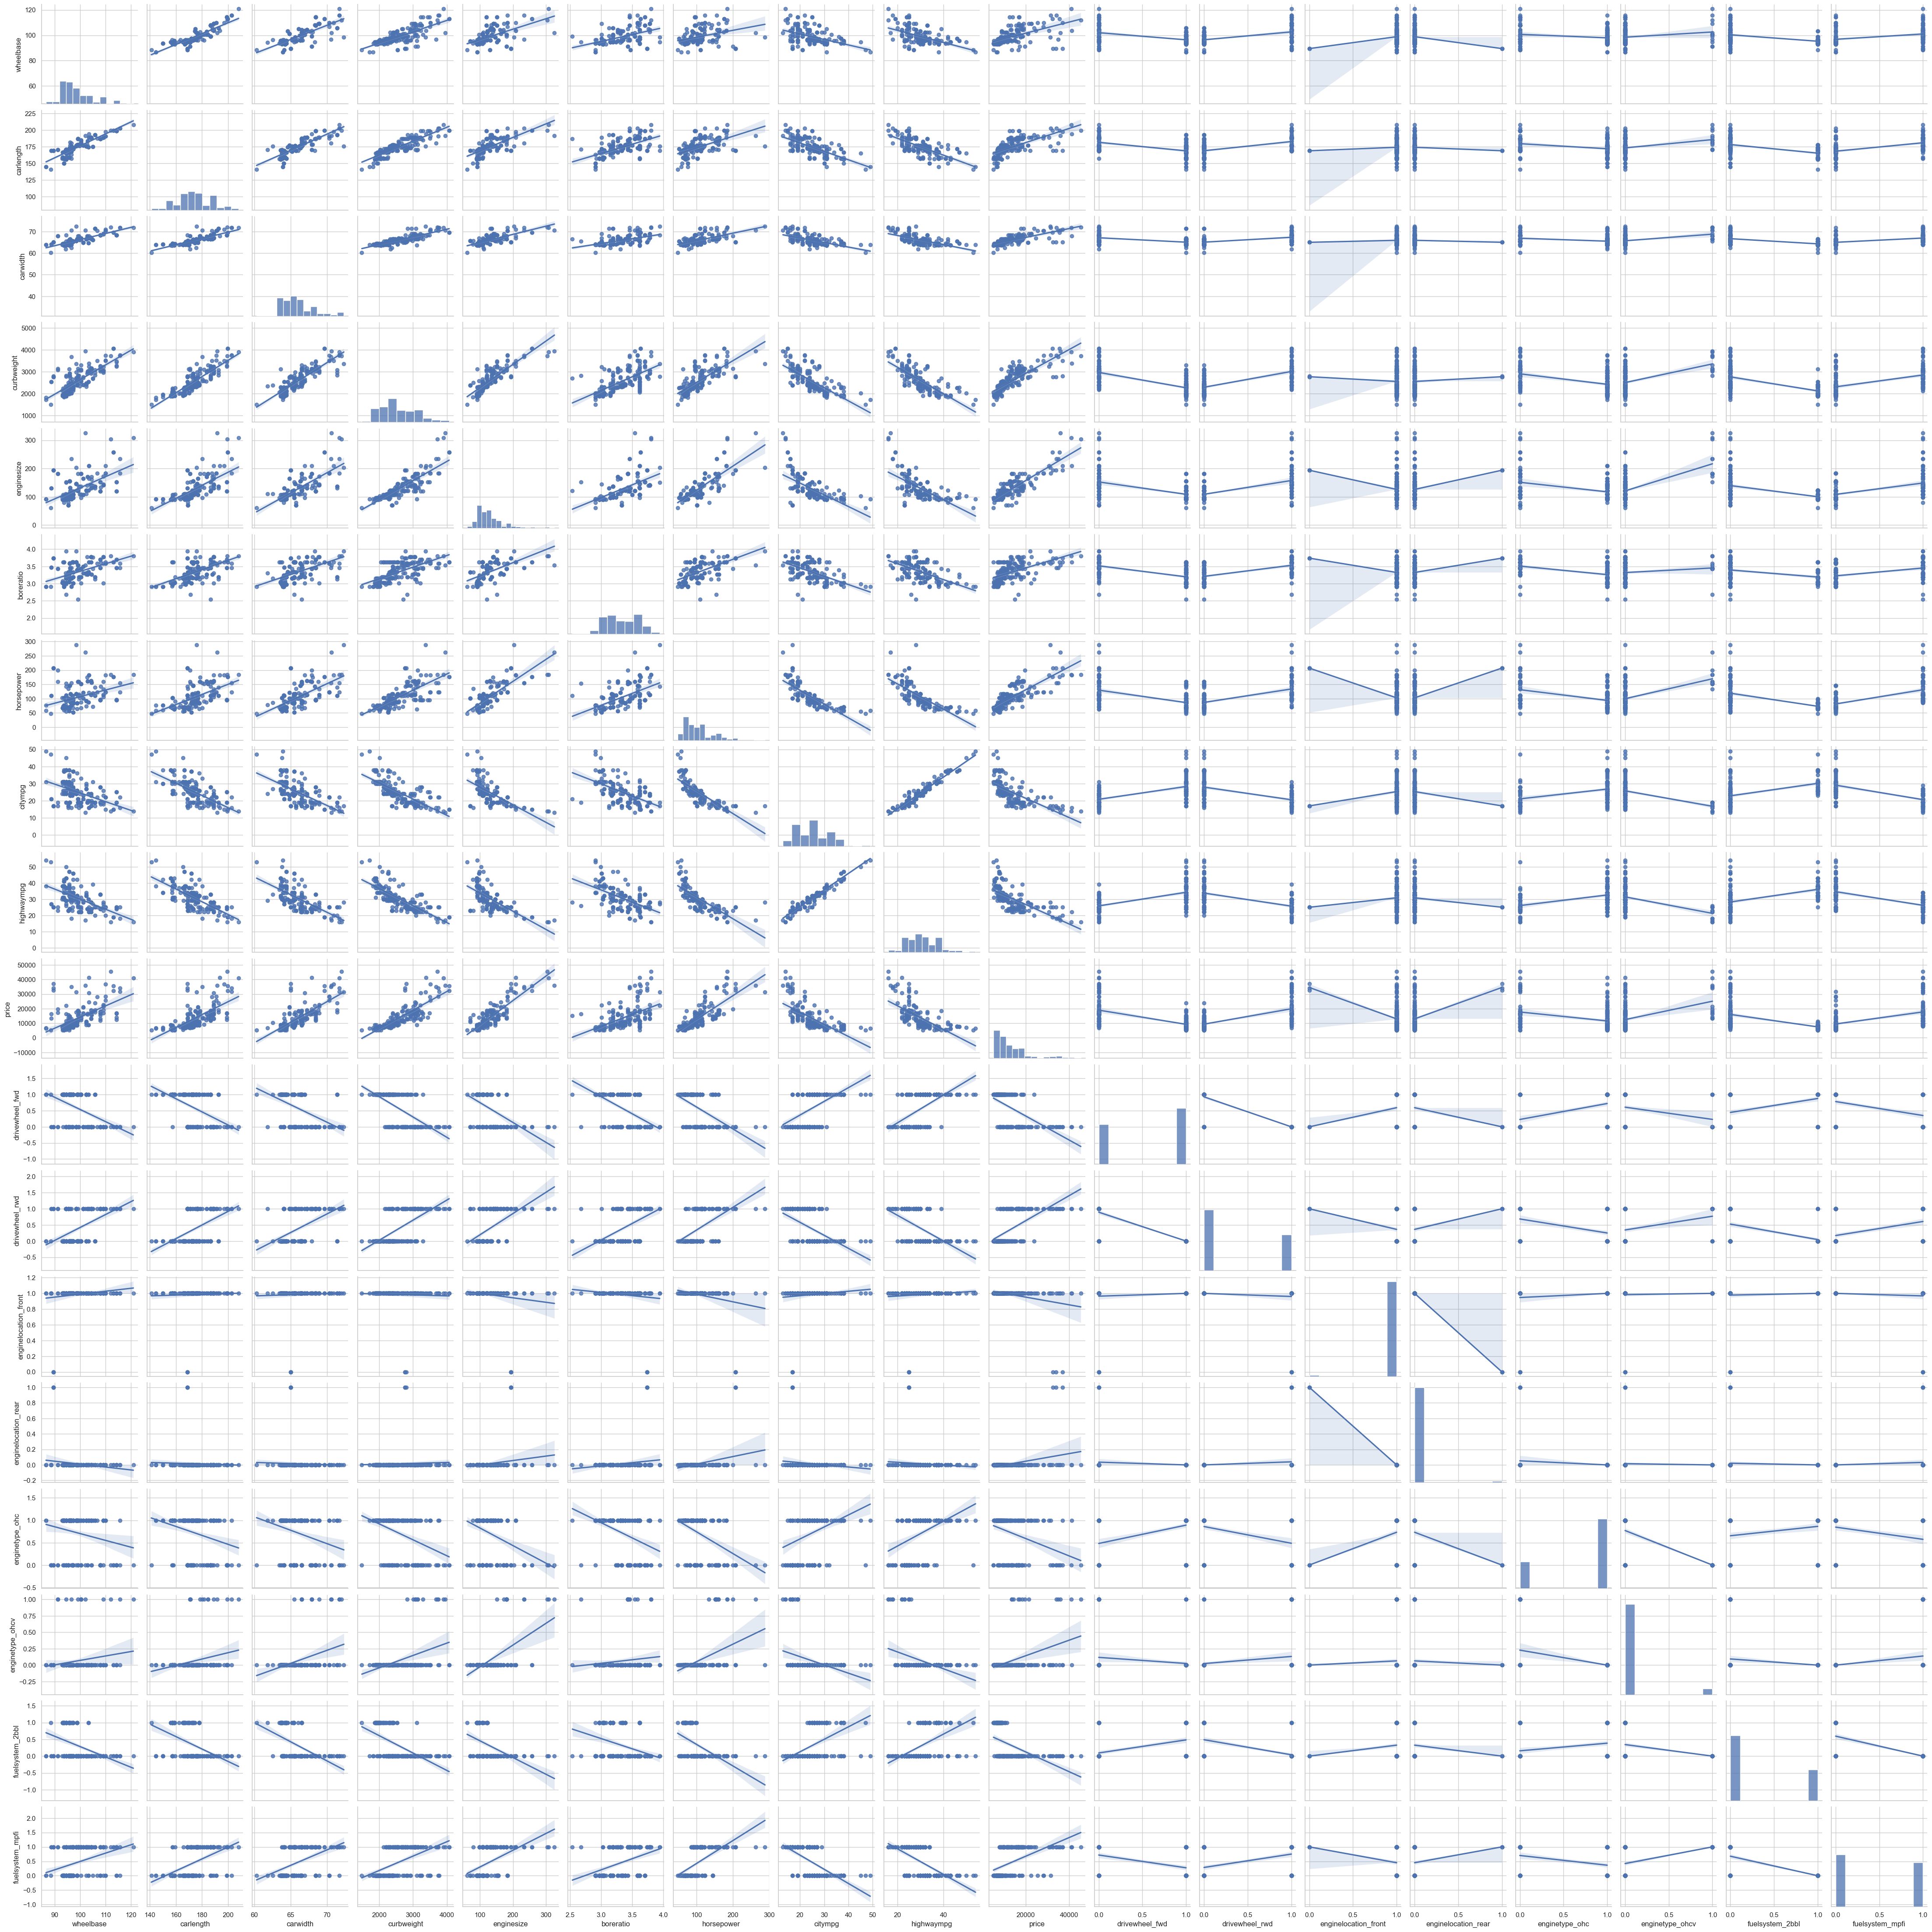

In [14]:
# Calcular a correlação e selecionar a linha de correlação 'price'
correlation_with_price = df_dummies.corr().round(2).loc['price']

# Filtrar apenas as colunas com alta correlação com 'price'
high_corr_columns = correlation_with_price[correlation_with_price.abs() > 0.3].index

# Plotar os scatter plots com linha de regressão para as colunas selecionadas
sns.set(style="whitegrid")
pairplot = sns.pairplot(df_dummies[high_corr_columns], kind='reg')


pairplot.savefig("scatter_plot_with_regression.png")
plt.show()


## 3.3 Comportamento da Variável Dependente Price

In [15]:
# configuração de grafico
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### 3.3.1 BoxPlot

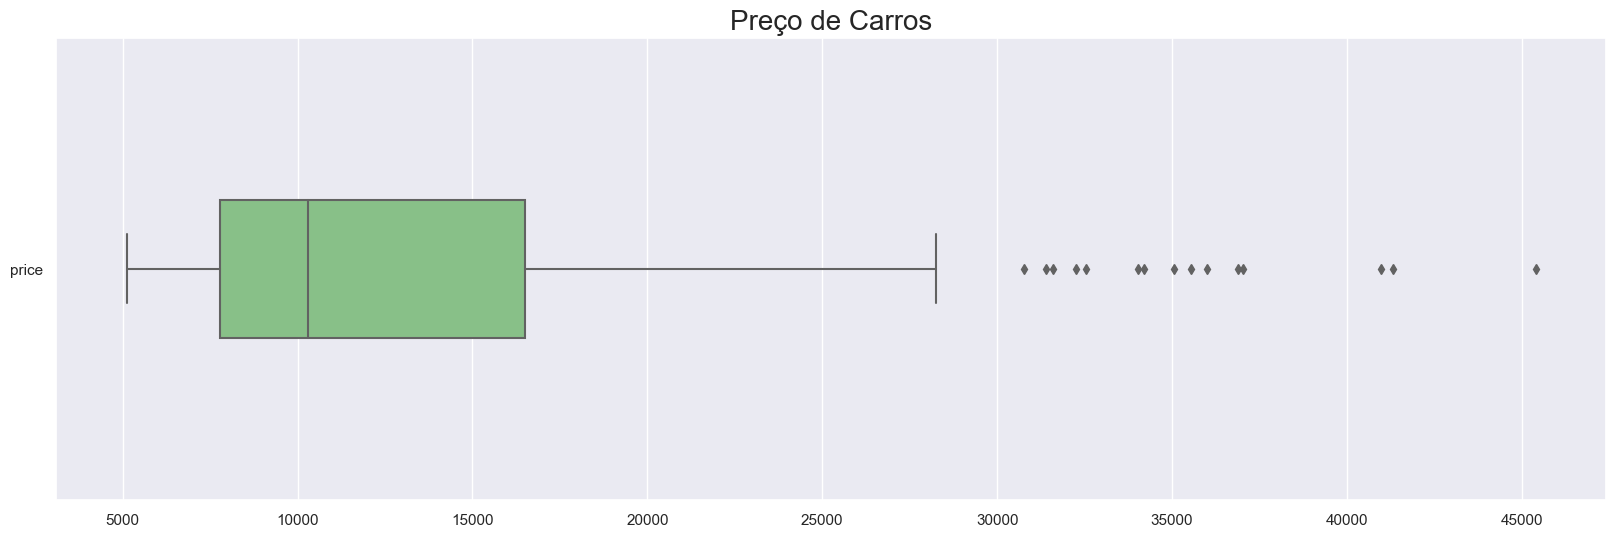

In [16]:
ax = sns.boxplot(df_dummies[['price']], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço de Carros', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax;

### 3.3.2 Distribuição

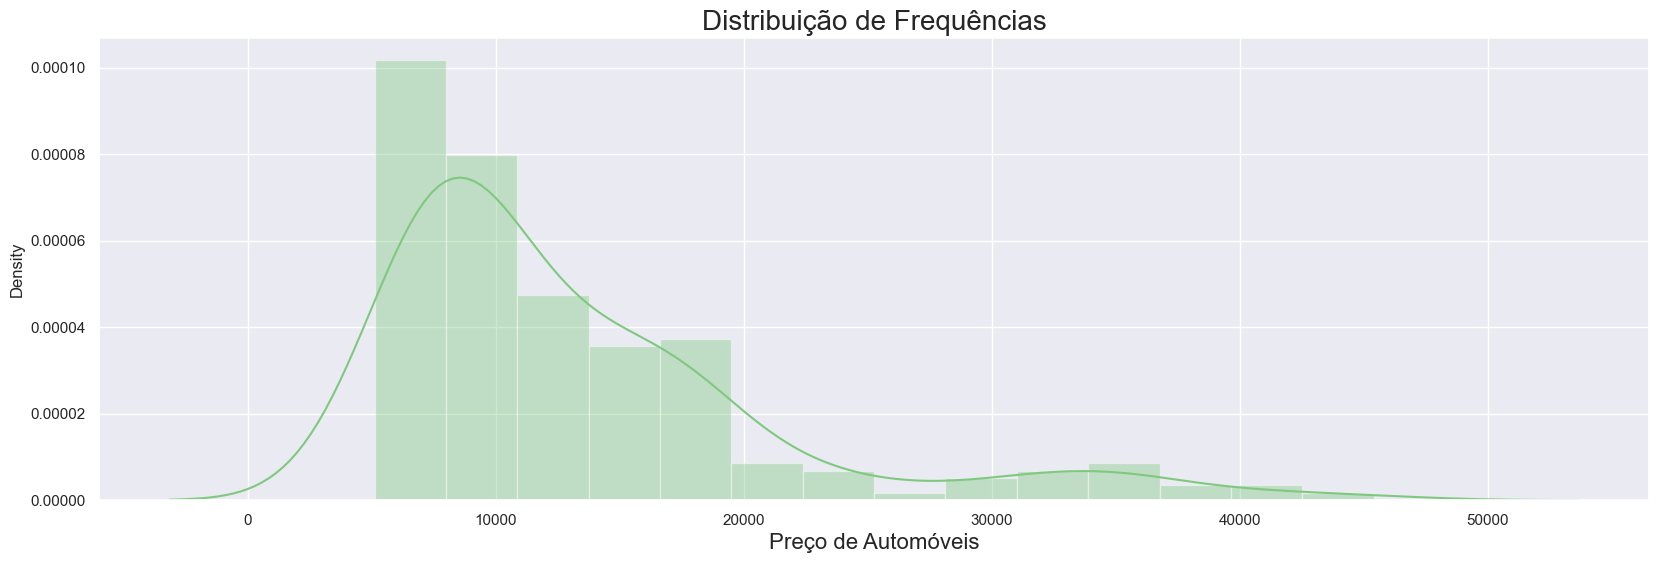

In [17]:
ax = sns.distplot(df_dummies[['price']])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

<b>Possível notar assimetria a direita, para melhorar o modelo o ideal é o comportamento ser semelhante a uma distribuição normal.</b>

## 3.4 Tratando Outliers

In [18]:
# Calcula o primeiro e terceiro quartis (Q1 e Q3)
Q1 = df_dummies['price'].quantile(0.25)
Q3 = df_dummies['price'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define os limites para considerar um valor como outlier
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra o DataFrame removendo os outliers
df_dummies = df_dummies[(df_dummies['price'] >= limite_inferior) & (df_dummies['price'] <= limite_superior)]


# 4. Regressão Linear Multipla

## 4.1 Tratando Variavel price

In [19]:
y = df_dummies['price']

In [20]:
y_log = np.log(df_dummies['price'])

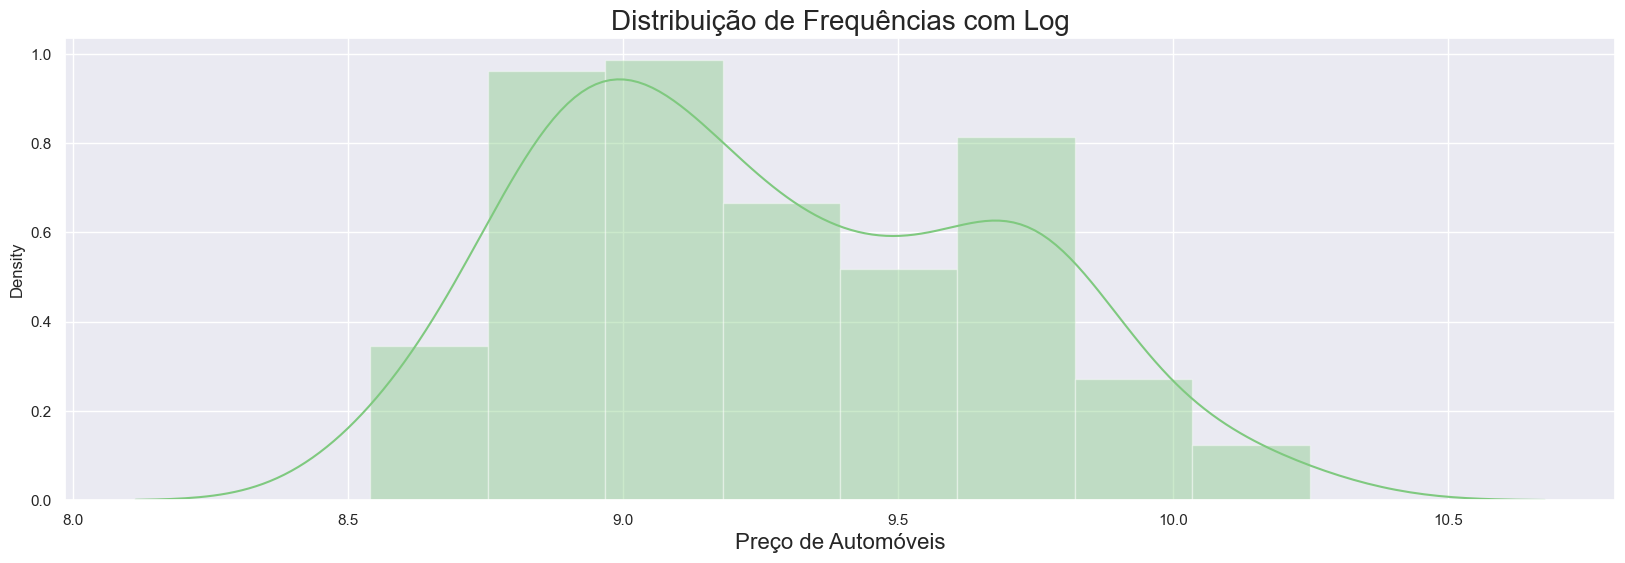

In [21]:
ax = sns.distplot(y_log)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências com Log', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax;

## 4.2 Tratando Variaveis dependentes

In [22]:
del df_dummies['price']
del df_dummies['car_ID']

In [23]:
scaler = StandardScaler()
df_dummies_scaling = scaler.fit_transform(df_dummies)
df_dummies_scaling = pd.DataFrame(df_dummies_scaling, columns=df_dummies.columns)

In [24]:
X = df_dummies_scaling

## 4.3 Criando bases de Treino e Teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train_com_constante = sm.add_constant(X_train)

In [27]:
X_train_com_constante

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
111,-0.827721,-0.871355,-0.868858,-0.485780,-0.997372,-1.221560,-0.649924,-0.182553,-0.762251,-1.278170,-0.070119,-0.195689,-0.969657,0.798396,0.815394,1.003033,-0.333333,0.333333,0.483494,-0.483494,-0.146647,-0.164399,-0.755148,1.088075,-0.389249,-0.222988,0.763763,-0.687654,0.0,0.0,-0.235702,0.0,-0.259645,0.565194,-0.259645,-0.209657,-0.146647,-0.247896,1.370689,-0.12666,-0.333333,-0.072739,-0.852803,-0.222988,-0.072739
8,-0.827721,-0.871355,1.428444,1.752928,3.132839,0.886528,1.362597,-1.627765,0.469848,-0.665100,0.490486,-0.470327,1.418696,0.798396,-1.443927,-1.783623,-0.333333,0.333333,-2.068279,2.068279,-0.146647,-0.164399,-0.755148,1.088075,-0.389249,-0.222988,0.763763,-0.687654,0.0,0.0,-0.235702,0.0,-0.259645,0.565194,-0.259645,-0.209657,-0.146647,-0.247896,-0.729560,-0.12666,-0.333333,-0.072739,1.172604,-0.222988,-0.072739
106,0.737125,-0.871355,1.846135,1.224099,1.448148,0.927863,1.461537,-0.182553,0.581857,1.174110,-0.136073,-0.794899,1.485039,1.011003,-1.282547,-1.164366,-0.333333,0.333333,-2.068279,2.068279,-0.146647,-0.164399,-0.755148,1.088075,-0.389249,-0.222988,-1.309307,1.454219,0.0,0.0,-0.235702,0.0,3.851407,-1.769303,-0.259645,-0.209657,-0.146647,-0.247896,-0.729560,-0.12666,-0.333333,-0.072739,1.172604,-0.222988,-0.072739
89,0.737125,-0.871355,-0.204349,0.051862,-0.236543,0.390508,-0.400327,-0.182553,0.059149,0.101237,0.721323,-0.420393,-0.007682,0.160574,0.169874,0.383776,-0.333333,0.333333,0.483494,-0.483494,-0.146647,-0.164399,-0.755148,1.088075,-0.389249,-0.222988,0.763763,-0.687654,0.0,0.0,-0.235702,0.0,-0.259645,0.565194,-0.259645,-0.209657,-0.146647,-0.247896,1.370689,-0.12666,-0.333333,-0.072739,-0.852803,-0.222988,-0.072739
90,0.737125,-0.871355,0.403202,0.783409,0.469940,0.555848,1.382835,1.262659,2.336666,0.484406,0.061788,-0.295557,1.816755,0.160574,-1.443927,-1.473995,-0.333333,0.333333,0.483494,-0.483494,-0.146647,-0.164399,-0.755148,1.088075,-0.389249,-0.222988,0.763763,-0.687654,0.0,0.0,-0.235702,0.0,-0.259645,-1.769303,-0.259645,4.769696,-0.146647,-0.247896,-0.729560,-0.12666,-0.333333,-0.072739,1.172604,-0.222988,-0.072739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.737125,-0.871355,3.023265,2.299384,1.502493,2.043910,2.259800,-0.182553,1.253912,1.518962,0.886207,2.700490,-0.074025,-2.071801,-0.152886,-1.009552,3.000000,-3.000000,-2.068279,2.068279,-0.146647,-0.164399,-0.755148,-0.919054,2.569047,-0.222988,-1.309307,1.454219,0.0,0.0,-0.235702,0.0,3.851407,-1.769303,-0.259645,-0.209657,-0.146647,-0.247896,-0.729560,-0.12666,3.000000,-0.072739,-0.852803,-0.222988,-0.072739
67,-0.045298,1.147638,-0.868858,-1.367161,-0.671302,-1.221560,-1.070418,-0.182553,-0.986269,-1.278170,-0.070119,-0.195689,-0.969657,0.798396,0.815394,1.003033,-0.333333,0.333333,0.483494,-0.483494,-0.146647,-0.164399,1.324244,-0.919054,-0.389249,-0.222988,0.763763,-0.687654,0.0,0.0,-0.235702,0.0,-0.259645,0.565194,-0.259645,-0.209657,-0.146647,-0.247896,1.370689,-0.12666,-0.333333,-0.072739,-0.852803,-0.222988,-0.072739
117,-1.610145,1.147638,0.156384,1.215285,0.469940,0.969198,0.400185,-0.182553,0.096485,0.905892,-0.597747,-0.218160,0.423549,0.266878,-0.798407,-0.545109,-0.333333,0.333333,0.483494,-0.483494,-0.146647,-0.164399,1.324244,-0.919054,-0.389249

In [28]:
# Como o y_train esta na matriz 2d eu converto para 1d com y_train.values.ravel()
#del X_train_com_constante['carlength']
modelo_statsmodels = sm.OLS(y_train.values.ravel(), X_train_com_constante, hasconst=True).fit()

In [29]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     25.00
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.19e-39
Time:                        19:18:44   Log-Likelihood:                -1345.6
No. Observations:                 152   AIC:                             2761.
Df Residuals:                     117   BIC:                             2867.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
symboling             -175.3683 

### 4.3.1 Selecionando colunas com signicancia estatistica para o modelo

In [30]:
import statsmodels.api as sm

results = modelo_statsmodels
p_values = results.pvalues
colunas_significantes = p_values[p_values <= 0.005].index
colunas_significantes

Index(['carwidth', 'stroke', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [31]:
X_train = X_train[colunas_significantes]
X_test = X_test[colunas_significantes]

## 4.4 Treinando o Modelo

In [32]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [33]:
modelo.score(X_train, y_train).round(3)

0.686

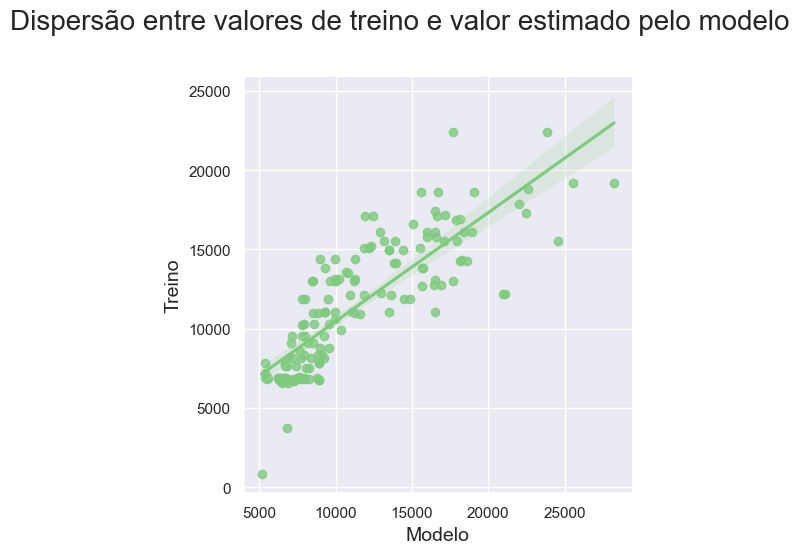

In [34]:
y_predict_train = modelo.predict(X_train)
#df = pd.DataFrame({'treino':np.exp(y_train),'modelo':np.exp(y_predict_train)})
df = pd.DataFrame({'treino':y_train,'modelo':y_predict_train})

ax = sns.lmplot(x='treino', y='modelo', data=df)
ax.fig.suptitle('Dispersão entre valores de treino e valor estimado pelo modelo', fontsize=20, y=1.1)
ax.set_axis_labels("Modelo", 'Treino', fontsize =14)
ax;

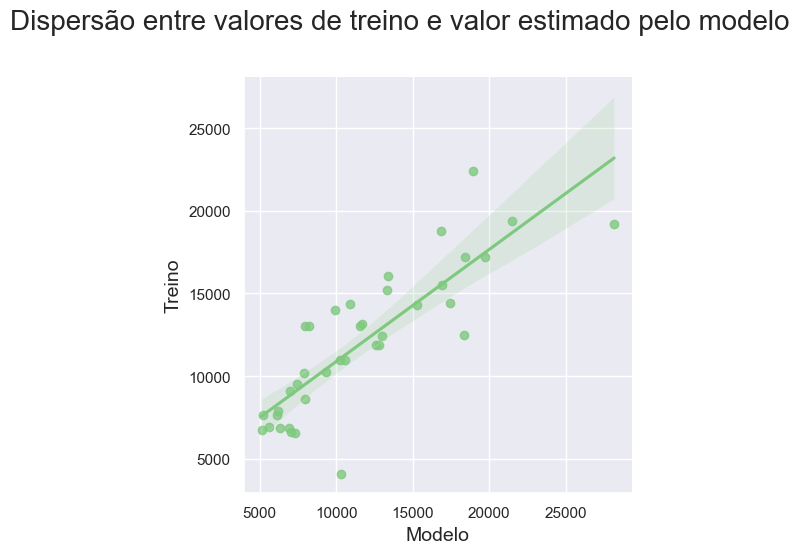

In [35]:
y_predict_train = modelo.predict(X_test)
#df = pd.DataFrame({'treino':np.exp(y_train),'modelo':np.exp(y_predict_train)})
df = pd.DataFrame({'treino':y_test,'modelo':y_predict_train})

ax = sns.lmplot(x='treino', y='modelo', data=df)
ax.fig.suptitle('Dispersão entre valores de treino e valor estimado pelo modelo', fontsize=20, y=1.1)
ax.set_axis_labels("Modelo", 'Treino', fontsize =14)
ax;

## 4.5 Equação do Modelo

In [36]:
# Coeficientes e interceptação
coeficientes = modelo.coef_
interceptacao = modelo.intercept_

nomes_variaveis = X.columns

# Construindo a equação
equacao = f"price = {interceptacao:.2f} + "
for i, coef in enumerate(coeficientes):
    equacao += f"{coef:.2f} * {nomes_variaveis[i]}"
    if i < len(coeficientes) - 1:
        equacao += " + "

print("Equação do modelo:")
print(equacao)

Equação do modelo:
price = 11579.33 + 2932.57 * symboling + -450.34 * doornumber + 0.00 * wheelbase + 0.00 * carlength + -0.00 * carwidth + 350.08 * carheight + 196.00 * curbweight + -648.42 * cylindernumber + -1200.42 * enginesize + 67.35 * boreratio + 0.00 * stroke + 551.85 * compressionratio + -124.18 * horsepower + -44.45 * peakrpm


## 4.6 Métricas

### 4.6.1 Erro Médio Absoluto (Mean Absolute Error - MAE):

In [37]:
previsoes = modelo.predict(X_test)
valores_verdadeiros = y_test

# Cálculo das diferenças absolutas entre previsões e valores verdadeiros
diferencas_absolutas = [abs(previsao - verdadeiro) for previsao, verdadeiro in zip(previsoes, valores_verdadeiros)]

# Cálculo do MAE (Erro Médio Absoluto)
mae = sum(diferencas_absolutas) / len(diferencas_absolutas)

print("MAE:", mae)


MAE: 2224.569519704164


### 4.6.2 R²

In [38]:
from sklearn.metrics import r2_score

# Suponha que você tenha as previsões e os valores verdadeiros armazenados em listas
previsoes = modelo.predict(X_test)
valores_verdadeiros = y_test

# Cálculo do R² (Coeficiente de Determinação)
r2 = r2_score(valores_verdadeiros, previsoes)

print("R²:", r2)

R²: 0.6987937760624948


### 4.6.3 R² Ajustado

In [39]:
previsoes = modelo.predict(X_test)
valores_verdadeiros = y_test


# Suponha que você tenha o valor do R-quadrado (R²) e o número de variáveis independentes (p) disponíveis
r_squared = r2_score(valores_verdadeiros, previsoes)
n = X_test.shape[0]
p = len(X_test.columns)

# Cálculo do R-quadrado ajustado
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.5154508571440134


### 4.6.4 Variação Média absoluta dos preços previsto em relação aos reais

In [40]:
# Variação Média absoluta dos preços previsto em relação aos reais (%)
sum(previsoes / y_test -1)/len(y_test)

0.09164734851378531

### 4.6.5 Validação Cruzada (métrica: Variação Média absoluta dos preços previsto em relação aos reais (%))

In [41]:
# Suponha que você já tenha os dados em X e y como DataFrames do pandas

# Converta os DataFrames em matrizes NumPy
X_vc = X.values
y_vc = y.values

# Crie o modelo de regressão linear
modelo = LinearRegression()

# Define o número de folds desejado
n_folds = 5

# Inicialize o objeto KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Calcule a variação média dos preços previstos em relação aos valores reais para cada fold
for fold, (train_index, test_index) in enumerate(kf.split(X_vc), start=1):
    X_train, X_test = X_vc[train_index], X_vc[test_index]
    y_train, y_test = y_vc[train_index], y_vc[test_index]

    # Treine o modelo no conjunto de treinamento
    modelo.fit(X_train, y_train)
    
    # Faça as previsões no conjunto de teste
    previsoes = modelo.predict(X_test)
    
    # Calcule a variação média para este fold
    variacao_media_fold = np.mean(previsoes / y_test - 1)
    print(f"Fold {fold} - Variação Média: {variacao_media_fold:.4f}")

Fold 1 - Variação Média: -0.0014
Fold 2 - Variação Média: 0.0403
Fold 3 - Variação Média: 0.0317
Fold 4 - Variação Média: 0.0270
Fold 5 - Variação Média: -0.0143


In [43]:
(-0.0014)+(0.0403)+(0.0317)+(0.0270)+(-0.0143)/5

0.09473999999999999

# 5. Conclusão

Por fim com esse estudo podemos concluir que as principais variáveis que para precificação de automóveis no mercado americano são:

'carwidth', 'stroke', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'

Com base nessas variáveis escolhidas por possuírem uma correlação elevada em relação as demais variavéis, obtive o **R² médio de 0.7277**, contudo é importante ressaltar que não obtivemos bons resultado com veículos mais caros (veículos de luxo), é que para esse tipo de veículo o que as variáveis podem ser relevantes para sua precificação podem ser diferentes, assim sendo necessário um novo estudo para esta classe de veículos.